In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [4]:
data.head(4)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0


In [5]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


<AxesSubplot: >

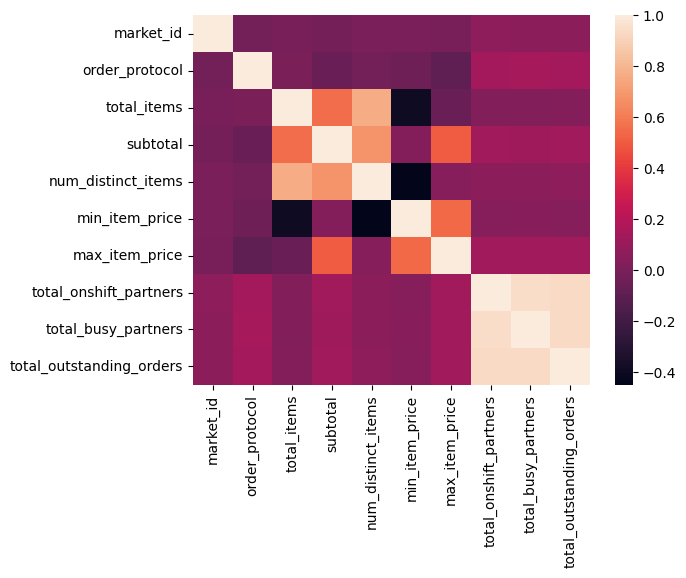

In [6]:
sns.heatmap(data.corr(numeric_only=True))

In [7]:
data.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

# Understanding the features
* market id: integer id for the market where the restaurant lies
* created at: the timestamp at which the order was placed
* actual delivery time: the timestamp when the order was delivered
* store_primary_category: category for the restaurant
* order protocol: integer code value for order protocol(how the order was placed le: through porter, call to restaurant, pre booked, third part etc)
* total items subtotal: final price of the order
* num_distinct items: the number of distinct items in the order
* actual delivery time: the timestamp when the order was delivered
* store_primary_category: category for the restaurant
* order protocol: integer code value for order protocol(how the order was placed le: through porter, call to restaurant, pre booked, third part etc)
* total items subtotal: final price of the order
* num_distinct items: the number of distinct items in the order
* min_item_price: price of the cheapest item in the order
* max_item_price: price of the costliest item in order
* total_onshift_partners: number of delivery partners on duty at the time order was placed
* total_busy_partners: number of delivery partners attending to other tasks
* total outstanding_orders: total number of orders to be fulfilled at the moment

# Data Preprocessing and Cleaning

In [8]:
data["store_primary_category"]=data["store_primary_category"].fillna("Not Specified")

In [9]:
data=data.dropna()

In [10]:
data["store_primary_category"].unique()

array(['american', 'mexican', 'Not Specified', 'indian', 'italian',
       'sandwich', 'thai', 'cafe', 'salad', 'pizza', 'chinese',
       'singaporean', 'burger', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'vegan',
       'asian', 'barbecue', 'breakfast', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'persian', 'nepalese', 'korean', 'sushi', 'latin-american',
       'chocolate', 'burmese', 'hawaiian', 'british', 'pasta', 'alcohol',
       'vegetarian', 'dim-sum', 'peruvian', 'turkish', 'ethiopian',
       'bubble-tea', 'german', 'french', 'caribbean', 'gluten-free',
       'comfort-food', 'gastropub', 'afghan', 'pakistani', 'moroccan',
       'tapas', 'malaysian', 'soup', 'brazilian', 'european', 'cheese',
       'african', 'argentine', 'kosher', 'irish', 'spanish', 'russian',
       'southern', 'lebanese', 'belgian', 'alcohol-plus-food'],
      dtype=object)

* here we will create a feature of how much time it took for delivery .
* Here we will drop delivery time column .
* we will the the hour parameter of order time so we can know that at which time delivery is late or fast.

In [11]:
data["delivery_time"]=(pd.to_datetime(data["actual_delivery_time"])-pd.to_datetime(data["created_at"])).dt.total_seconds()

In [12]:
data["created_at"]=pd.to_datetime(data["created_at"]).dt.hour

<AxesSubplot: >

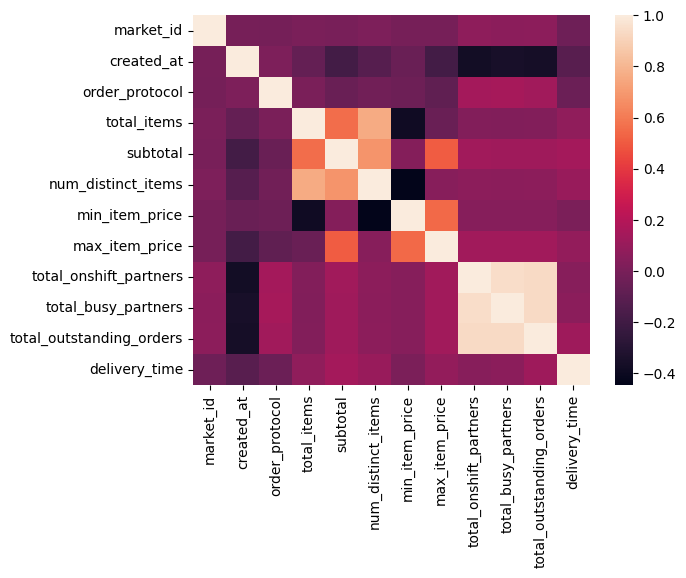

In [13]:
sns.heatmap(data.corr(numeric_only=True))

* Droping the unnecessary features

In [14]:
data=data.drop(["actual_delivery_time","store_id"],axis=1)

In [15]:
data.isna().sum()

market_id                   0
created_at                  0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
delivery_time               0
dtype: int64

# visualizing data 

In [16]:
data=data.sort_values(by="created_at",ascending=True)

* Here we can see that the delivery time is very high at 7:00 am to 8:00 am and from market 1 and 4 

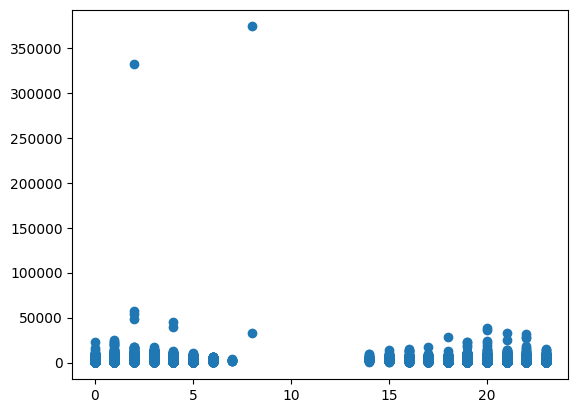

In [17]:
plt.scatter(data["created_at"],data["delivery_time"])

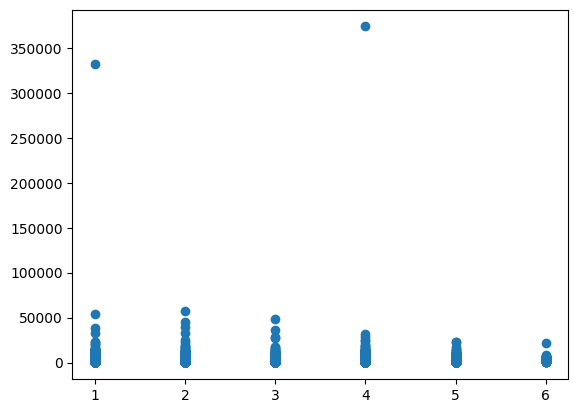

In [18]:
plt.scatter(data["market_id"],data["delivery_time"])

we need to remove the outliers present in delivery time so that our model works well

In [19]:
(15000/60)/60

4.166666666666667

In [20]:
data[data["delivery_time"]>15000].shape

(44, 13)

* we will remove the data which is greater than 15000 .

In [21]:
data=data[data["delivery_time"]<15000]

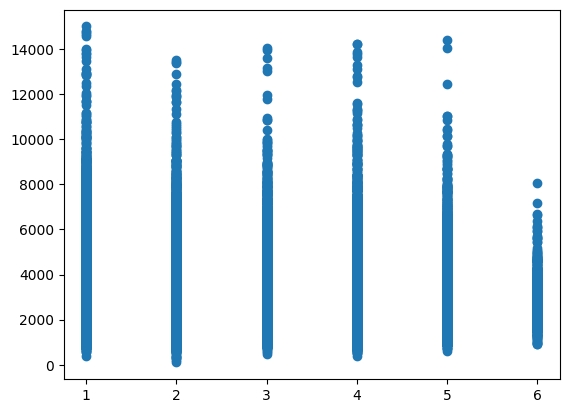

In [22]:
plt.scatter(data["market_id"],data["delivery_time"])

# Data Preprocessing for model training

In [23]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:].values.ravel()


In [24]:
le=LabelEncoder()

In [25]:
X["store_primary_category"]=le.fit_transform(X["store_primary_category"])

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
knnr=KNeighborsRegressor(n_neighbors=5)
lir=LinearRegression()
rfr=RandomForestRegressor(n_estimators=100)
dtr=DecisionTreeRegressor(max_depth=5)


In [28]:
models={"knnr":knnr,"lir":lir,"rfr":rfr,"dtr":dtr}

In [29]:
results=pd.DataFrame(y_test,columns=["y_test"])

In [30]:
for model_name, model in models.items():
    print(f"working on {model_name}")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results[model_name]=y_pred

working on knnr
working on lir
working on rfr
working on dtr


In [31]:
results

,y_test,knnr,lir,rfr,dtr
0,5763.0,2478.2,2846.856326,2683.03,3217.904993
1,2254.0,2444.4,3233.055579,3446.03,2607.392384
2,1707.0,1618.4,2679.345829,2707.48,2698.465493
3,2161.0,3453.8,2948.551102,2426.01,3080.277954
4,3442.0,2243.4,2946.590277,3403.75,3137.302632
...,...,...,...,...,...
44928,1814.0,2253.0,2962.684396,2811.04,3010.715129
44929,2824.0,3839.2,2627.850542,2302.49,2396.244402
44930,2019.0,3246.4,2788.977882,2497.40,2396.244402
44931,1431.0,2417.4,2658.908802,2251.51,2698.465493


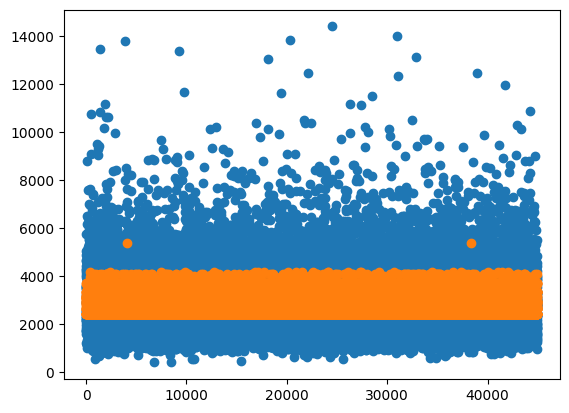

In [32]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["dtr"])

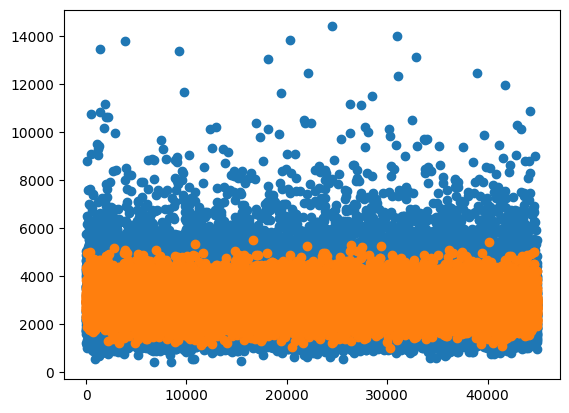

In [33]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["lir"])

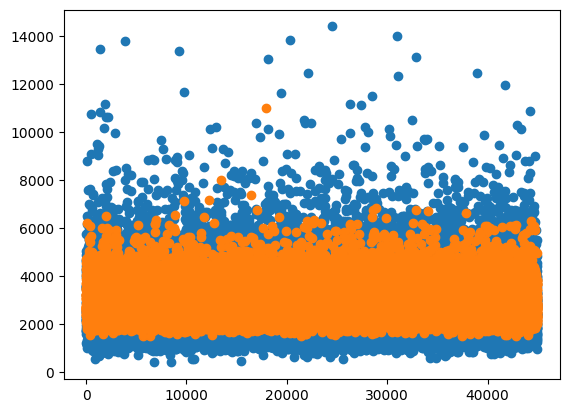

In [34]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["rfr"])

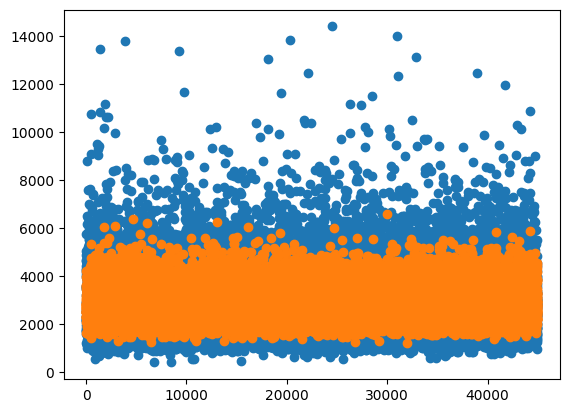

In [35]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["knnr"])